# HİPERSPEKTRAL GÖRÜNTÜ VERİSİ ÖN İŞLEME VE GÖRSELLEŞTİRME


### BU ÇALIŞMADA ŞUNLARA ODAKLANILMIŞTIR:
1. GİRİŞ
2. HİPERSPEKTRAL GÖRÜNTÜ VERİSİNİ NEREDEN İNDİRECEĞİZ ?
3. HİPERSPEKTRAL GÖRÜNTÜYÜ OKUMA
4. HİPERSPEKTRAL GÖRÜNTÜNÜN BANTLARINI GÖRSELLEŞTİRME
5. YER DOĞRUSU HARİTASININ GÖRSELLEŞTİRİLMESİ
6. HİPERSPEKTRAL GÖRÜNTÜDE PİKSEL VE SINIF ETİKETİ ÇIKARMA
7. SPEKTRAL İMZALARIN GÖRSELLEŞTİRİLMESİ

### 1. Giriş

In [1]:
![](hiperspektral_sınıflandırma_giriş.png)

'[]' is not recognized as an internal or external command,
operable program or batch file.


### 2. Hiperspektral Görüntü Verisini Nereden İndireceğiz ?

In [2]:
## https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes adresine girerek çeşitli verilere ulaşılabilir . 
# bu çalışmada pavia university verisi kullanıldı

### 3. Hiperspektral Görüntüyü Okuma

Hiperspektral görüntüyü okumak için bilimsel hesaplamalar yapmak amacıyla kullanılan **scipy** python paketi kullanılır 

In [3]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()
#The dimensions of the data. X burada bağımlı y ise bağımsız değişken.
print(f'Dataset: {X.shape}\nGround Truth: {y.shape}')

X shape: (610, 340, 103)
y shape: (610, 340)
Dataset: (610, 340, 103)
Ground Truth: (610, 340)


In [4]:
import numpy as np

# Verinizi bir NumPy dizisi olarak varsayalım
data = np.array(X)  # Buraya gerçek verinizi ekleyin

# Veriyi 0 ve 1 arasına normalleştirme
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

print(normalized_data)

[[[0.080875 0.062375 0.058    ... 0.402625 0.40475  0.40625 ]
  [0.0755   0.06825  0.065875 ... 0.30525  0.308    0.316   ]
  [0.077625 0.09325  0.0695   ... 0.2885   0.293125 0.295125]
  ...
  [0.0655   0.065625 0.07475  ... 0.367    0.3675   0.36875 ]
  [0.066    0.04125  0.00875  ... 0.342125 0.34675  0.353625]
  [0.088875 0.060375 0.052875 ... 0.32025  0.317375 0.311   ]]

 [[0.088125 0.085125 0.0835   ... 0.325875 0.325875 0.326125]
  [0.111375 0.0865   0.056625 ... 0.197625 0.195125 0.19025 ]
  [0.068375 0.063875 0.0755   ... 0.191875 0.191375 0.19225 ]
  ...
  [0.143625 0.08225  0.05425  ... 0.405875 0.406375 0.409625]
  [0.114625 0.1255   0.092875 ... 0.3535   0.35075  0.351   ]
  [0.129625 0.106125 0.068375 ... 0.311375 0.315875 0.31525 ]]

 [[0.1355   0.109375 0.08825  ... 0.2635   0.270875 0.272875]
  [0.041875 0.064625 0.076375 ... 0.138125 0.138625 0.136875]
  [0.13025  0.085375 0.03975  ... 0.10075  0.098875 0.10175 ]
  ...
  [0.099875 0.086625 0.060125 ... 0.345125 0.348

### 4. Hiperspektral görüntünün bantlarını görselleştirme

Pavia University sahnesi İtalya'nın kuzeyindeki Pavia üzerinde gerçekleştirilen bir uçuş kampanyası sırasında ROSIS sensörü tarafından elde edilen sahnedir.Spektral bant sayısı Pavia University için 103'tür . Pavia sahneleri, Pavia Üniversitesi (İtalya) Telekomünikasyon ve Uzaktan Algılama Laboratuvarı'ndan Prof. Paolo Gamba tarafından sağlandı.

Aşağıdaki kod bloğu hiperspektral görüntü içinden rastgele bir bant seçerek onu görselleştirir kullandığımız np.random.randint() fonksiyonundan ötürü kodu her çalıştırdığımızda farklı bir kanal karşımıza çıkar 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(normalized_data):
    plt.figure(figsize=(12, 6))
    band_no = np.random.randint(normalized_data.shape[2])
    #plt.imshow(normalized_data[:,:, band_no], cmap='jet')
    plt.imshow(normalized_data[:,:, band_no], cmap='nipy_spectral')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()


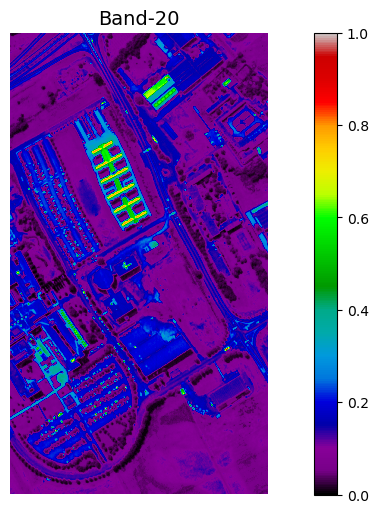

In [6]:
plot_band(normalized_data)

cmap ifadesi, bir renk haritasını (colormap) belirtir. matplotlib kütüphanesinde, renk haritaları, verileri renklere dönüştürmek için kullanılır.

Renk haritaları genellikle, bir görüntüyü veya bir dizi sayıyı görselleştirmek için kullanılır. Örneğin, bir ısı haritası oluştururken, belirli bir değeri belirli bir renge eşleyen bir renk haritası kullanılır. ‘jet’ renk haritası, bu tür bir görselleştirme için sıklıkla kullanılır.

Ancak, ‘jet’ renk haritasının bazı dezavantajları vardır. Özellikle, renkler arasındaki geçişlerin düzensiz olması ve belirli renk tonlarının diğerlerinden daha parlak görünmesi nedeniyle, verilerin yanıltıcı bir şekilde yorumlanmasına neden olabilir
altta ise gri skalada görüntüler ifade edilmiştir
nipy spectral için açıklama yaz.

(610, 340, 103)


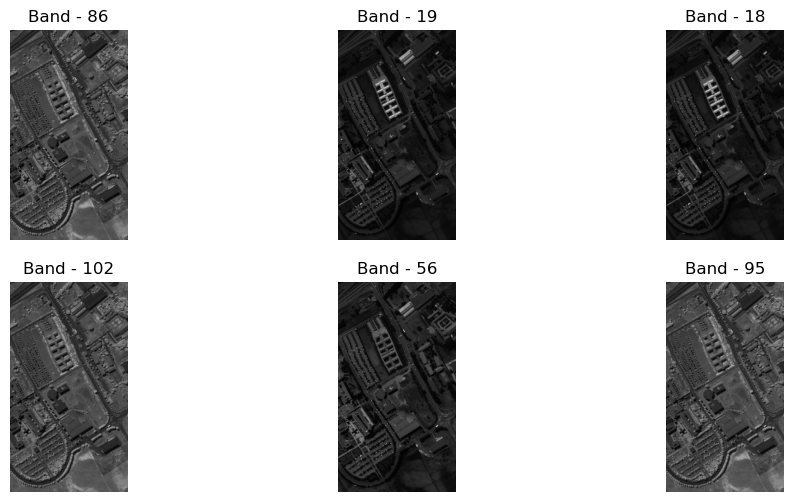

In [7]:
fig = plt.figure(figsize=(12, 6))
print(normalized_data.shape)
for i in range(1, 1 + 6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(normalized_data.shape[2])
    plt.imshow(normalized_data[:, :, q], cmap='gray')
    plt.axis('off')
    plt.title(f'Band - {q}')

plt.savefig('IP_Bands.png')


### 5. Yer Doğrusu Haritasının Görselleştirilmesi

Aşağıdaki kod parçacığı pavia University verimizin yer doğrusu haritasının görselleştirilmesini sağlar.

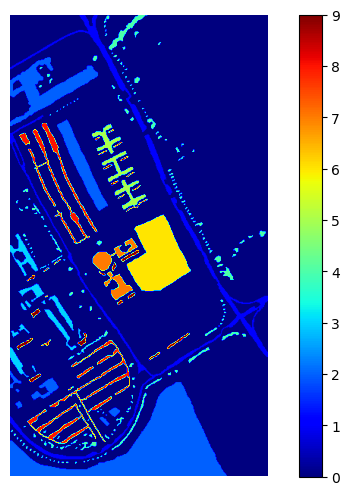

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

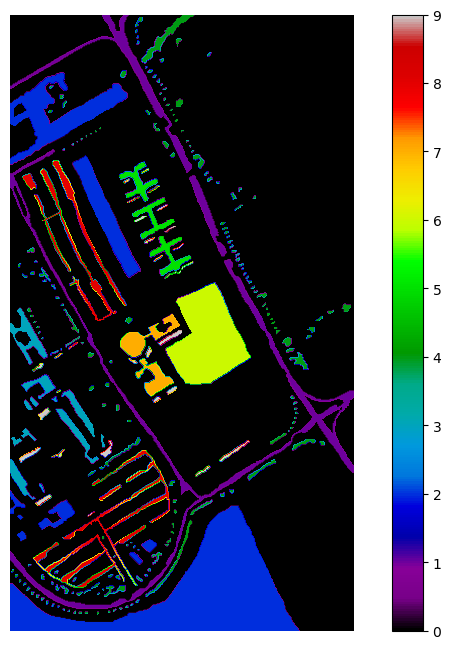

In [9]:
plt.figure(figsize = (10, 8))
plt.imshow(y, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

### 6. Hiperspektral Görüntüde Piksel ve Sınıf Etiketi Çıkarma

Aşağıdaki fonksiyon hiperspektral görüntünün piksellerini ve sınıf etiketlerini çıkarmak için kullanılır.

In [10]:
!pip install tqdm

In [11]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(normalized_data,y):
    df = pd.DataFrame()
    for i in tqdm(range(normalized_data.shape[2])):
        df = pd.concat([df, pd.DataFrame(normalized_data[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+normalized_data.shape[2])]+['class']
    return df
        

In [12]:
df = extract_pixels(normalized_data,y) 

100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:02<00:00, 35.97it/s]


In [13]:
df.head() #head fonksiyonu ile ilk 5 veriyi inceliyoruz.

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
0,0.080875,0.062375,0.058000,0.046375,0.036375,0.039875,0.045625,0.04025,0.037000,0.038125,...,0.427000,0.416875,0.407000,0.403250,0.400625,0.401250,0.402625,0.404750,0.406250,0
1,0.075500,0.068250,0.065875,0.056875,0.047250,0.047125,0.042000,0.03925,0.040500,0.041125,...,0.322875,0.317250,0.313625,0.313875,0.312625,0.308500,0.305250,0.308000,0.316000,0
2,0.077625,0.093250,0.069500,0.045000,0.035625,0.037500,0.034250,0.03450,0.041500,0.039875,...,0.286000,0.280250,0.274125,0.275250,0.278125,0.283250,0.288500,0.293125,0.295125,0
3,0.079625,0.074000,0.060250,0.069500,0.063500,0.035500,0.022250,0.02475,0.024125,0.028000,...,0.334375,0.326125,0.317625,0.318875,0.321375,0.321125,0.321625,0.327500,0.330500,0
4,0.078125,0.070000,0.060000,0.045000,0.047125,0.042625,0.033000,0.02600,0.028875,0.033250,...,0.299000,0.293000,0.286125,0.291000,0.301875,0.303000,0.298250,0.303875,0.307000,0


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band-1 to class
dtypes: float64(103), uint8(1)
memory usage: 163.2 MB


In [15]:
df.describe().T #describe fonksiyonu ile istatistiksel verilere ulaştık . Transpoz alarak daha okunur hale getirdik.

,count,mean,std,min,25%,50%,75%,max
band-1,207400.0,0.115666,0.055553,0.00000,0.081125,0.107125,0.138875,1.0
band-2,207400.0,0.106280,0.058558,0.00000,0.069375,0.095250,0.130750,1.0
band-3,207400.0,0.100045,0.061699,0.00000,0.060375,0.086750,0.126875,1.0
band-4,207400.0,0.101236,0.065904,0.00000,0.059125,0.086250,0.129500,1.0
band-5,207400.0,0.103761,0.069427,0.00000,0.060000,0.086625,0.132250,1.0
...,...,...,...,...,...,...,...,...
band-100,207400.0,0.278978,0.103425,0.01750,0.210625,0.278875,0.335375,1.0
band-101,207400.0,0.278093,0.103407,0.00000,0.209375,0.278250,0.334625,1.0
band-102,207400.0,0.279613,0.104262,0.01675,0.210250,0.280500,0.336500,1.0
band-103,207400.0,0.281681,0.105521,0.00000,0.211500,0.282625,0.339375,1.0


In [16]:
df.to_csv('Dataset.csv', index=False) 
#hiperspektral görüntünün piksellerini ve sınıf etiketlerini çıkardıktan sonra pandas dataframe olarak kullanmak için
#csv formatına çevirip kaydettik.

### 7. Spektral İmzaların Görselleştirilmesi

Bu kod bloğundaki fonksiyon spektral imzaları çizdirir.üstteki tek bir piksel için alttaki ise tüm pikseller için spektral imza grafiğini çizdirir.


In [17]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot( df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

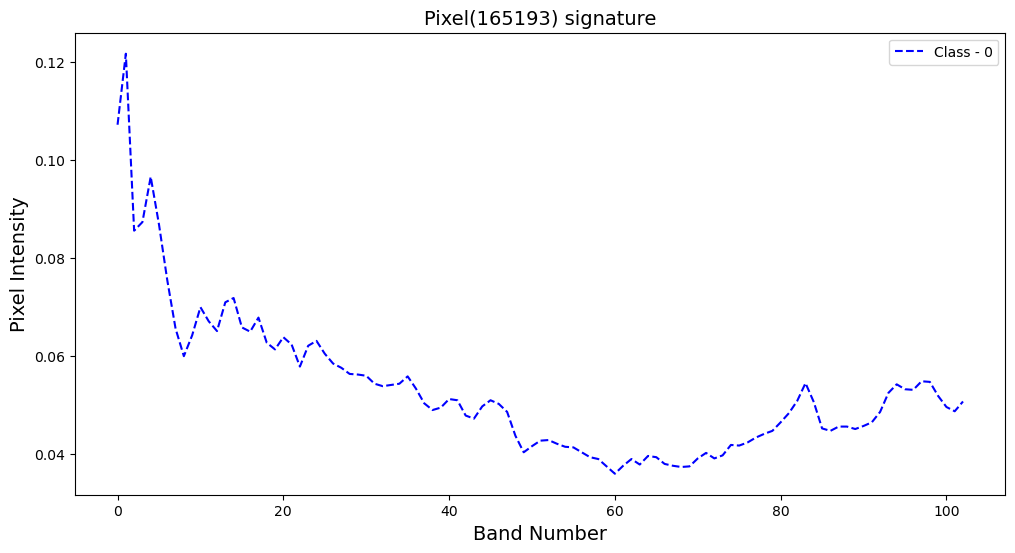

In [18]:
plot_signature(df)

### VERİ ÖN İŞLEME VE GÖRSELLEŞTİRME KISMININ SONU 
 